In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Final_csv.csv")

In [ ]:
df.head()

,job_id,company_name,company_id,estab_year,employees_count,experience,location,designation,detail_id,skills,hr_name,avg_employees_count,class,Image_link
0,270735,Carnera Technologies,77,2018,50 - 200 employees,0-3 Years,Work From Home,Inside Sales,77_270735,"Lead Generation, Sales",Roshni J,125,Class1,https://instahyre-2.s3-ap-south-1.amazonaws.co...
1,270736,Carnera Technologies,77,2018,50 - 200 employees,0-2 Years,Work From Home,Social Media,77_270736,"LinkedIn Sales Navigator, SEO, Social Media Ma...",Roshni J,125,Class1,https://instahyre-2.s3-ap-south-1.amazonaws.co...
2,272101,Concentrix,93,1983,More than 1000 employees,2-6 Years,"Bangalore, Gurgaon, Mumbai",Sr. Analyst,93_272101,"Adobe Launch, CSS, HTML, JavaScript",Deeksha Sharma,1000,Class4,https://instahyre-2.s3-ap-south-1.amazonaws.co...
3,270555,epiFi,133,2019,50 - 200 employees,2-5 Years,Bangalore,Relationship Manager,133_270555,"Corporate Sales, Lead Generation, Sales",Janaki B,125,Class1,https://instahyre-2.s3-ap-south-1.amazonaws.co...
4,270071,Jupiter,205,2019,50 - 200 employees,3-7 Years,Mumbai,Growth Manager,205_270071,"Digital Marketing, Facebook Marketing, Product...",Shashwat Shukla,125,Class1,https://instahyre-2.s3-ap-south-1.amazonaws.co...


In [ ]:
# class wise:
class_count=df.groupby('class')['company_name'].nunique()

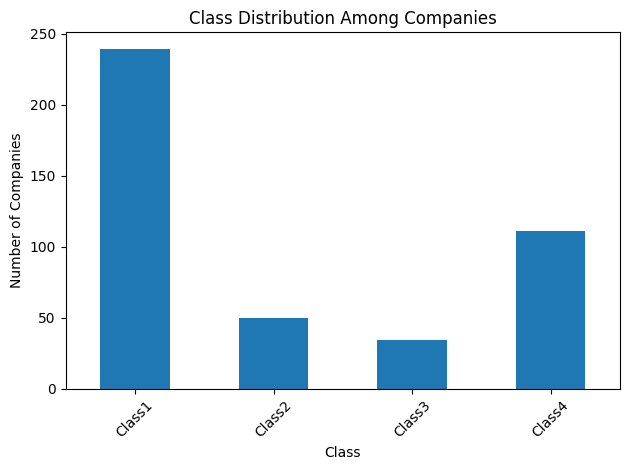

In [224]:
class_count.plot(kind='bar')
plt.title('Class Distribution Among Companies')
plt.xlabel('Class')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

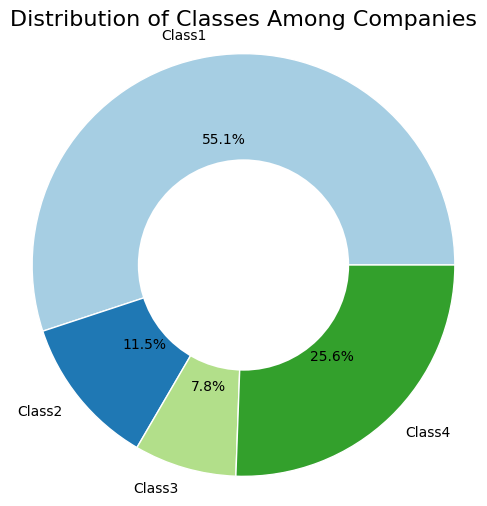

In [ ]:
# Create a doughnut chart
plt.figure(figsize=(6, 6))
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'white'})

# Draw a white circle in the center to create a doughnut effect
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of Classes Among Companies', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

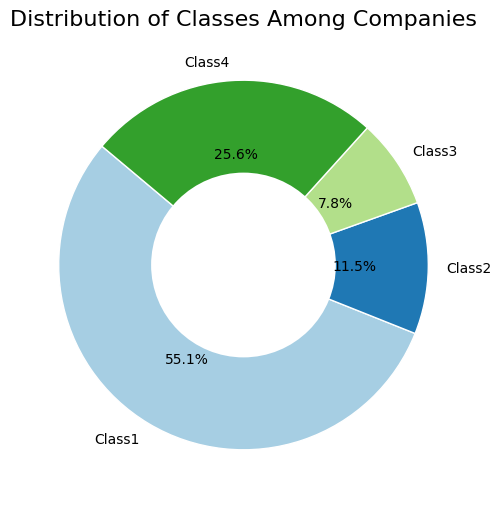

In [ ]:
# Create a doughnut chart
plt.figure(figsize=(6, 6))
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140, wedgeprops={'edgecolor': 'white'})

# Draw a white circle in the center to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add percentage labels inside the pie chart slices
plt.gca().set_aspect('equal')  # Equal aspect ratio for circular pie chart
plt.title('Distribution of Classes Among Companies', fontsize=16)

# Display the plot
plt.show()


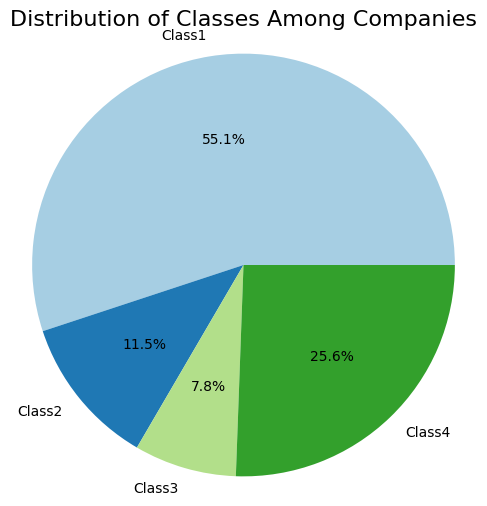

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Classes Among Companies', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [ ]:
# location wise:
all_locations=df['location'].str.split(",",expand=True).stack()
all_locations

0    0    Work From Home
1    0    Work From Home
2    0         Bangalore
     1           Gurgaon
     2            Mumbai
               ...      
780  0             Noida
781  0           Chennai
782  0         Hyderabad
783  0            Jaipur
784  0           Gurgaon
Length: 833, dtype: object

In [ ]:
value_counts=pd.Series(all_locations).value_counts()

In [ ]:
df_loc=pd.DataFrame({'location':value_counts.index,'count':value_counts.values})

In [ ]:
df_loc['location']=df_loc['location'].str.strip()

In [ ]:
unique_locations=list(set(df_loc['location']))
len(unique_locations)

34

In [ ]:
location_counts=df['location'].value_counts()
result = location_counts.reindex(unique_locations, fill_value=0)
result_sorted = result.sort_values(ascending=False)
result_sorted

In [ ]:
# Set up a custom color palette for the bars
colors = plt.cm.Paired(range(len(result_sorted)))

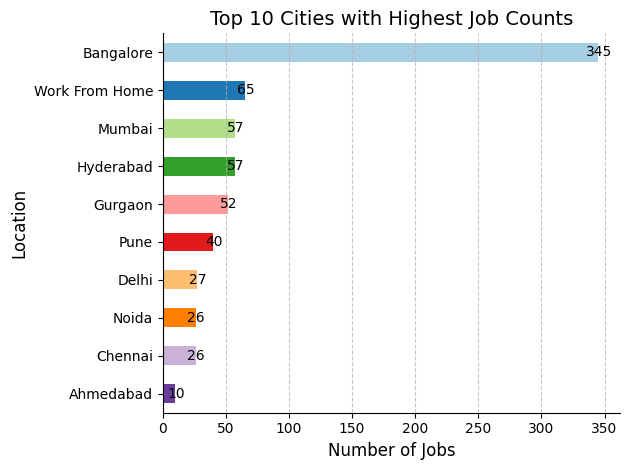

In [ ]:
# Create a bar chart for the bottom 10 cities
ax = result_sorted.head(10).plot(kind='barh', color=colors, legend=None)
# Add a grid, adjust the margins, and remove spines
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.margins(y=0.02)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Customize the plot labels and title
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 10 Cities with Highest Job Counts', fontsize=14)

# Add data labels to the bars
for rect in ax.patches:
    width = rect.get_width()
    plt.text(width + 0.5, rect.get_y() + rect.get_height() / 2, f'{int(width)}', ha='center', va='center', fontsize=10)
# Invert y-axis for better presentation
plt.gca().invert_yaxis()

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_loc=pd.DataFrame(result.sort_values(ascending=False))

In [ ]:
from google.colab import files

In [ ]:
df_loc.to_csv('location.csv')
files.download('location.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [226]:
# skills wise:
df['skills']=df['skills'].str.lower()

In [227]:
all_skills=df['skills'].str.split(",",expand=True).stack()

In [228]:
value_counts=pd.Series(all_skills.value_counts())
df_skills=pd.DataFrame({'skill':value_counts.index,'count':value_counts.values})
df_skills

,skill,count
0,python,107
1,java,77
2,javascript,68
3,sql,67
4,aws,64
...,...,...
723,video codecs,1
724,cpg,1
725,otc,1
726,vistex,1


In [229]:
df_skills.to_csv('skill.csv')
files.download('skill.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [230]:
df_skills=pd.read_csv("/content/skill.csv")

In [242]:
# unique skills and no of jobs for that skills:
df_skills=df_skills.sort_values(by='no_of_jobs',ascending=False)

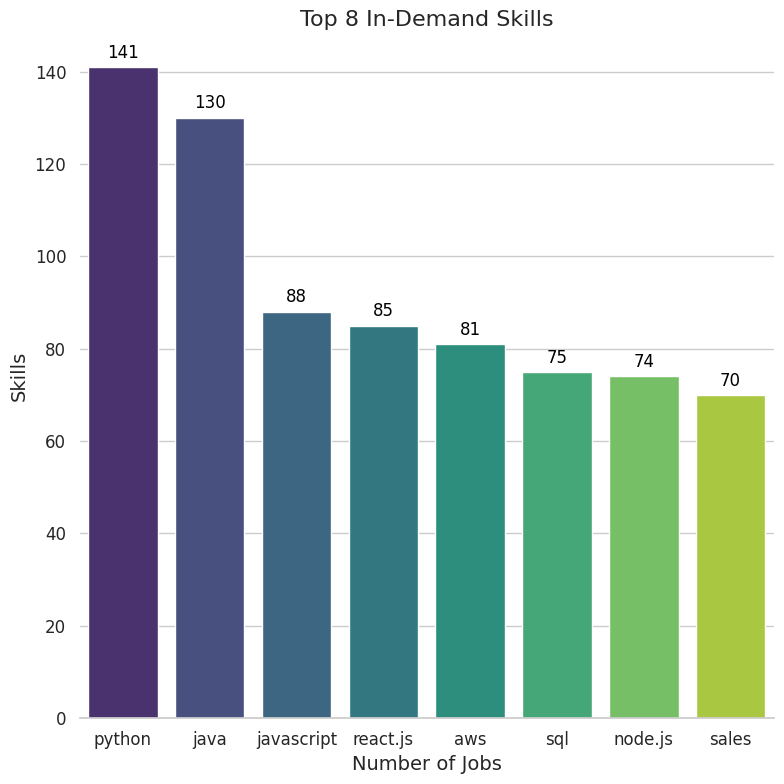

In [282]:
# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(8,8))
barplot = sns.barplot(x='skills', y='no_of_jobs', data=df_skills.head(8), palette='viridis')

# Add data labels to the bars
for index, value in enumerate(df_skills['no_of_jobs'].head(8)):
    #barplot.text(value + 2, index, str(value), ha='center', color='white', fontsize=12)
    barplot.text(index, value + 2, str(value), ha='center', color='black', fontsize=12)

plt.ylabel('Skills', fontsize=14)
plt.xlabel('Number of Jobs', fontsize=14)
plt.title('Top 8 In-Demand Skills', fontsize=16)

# Customize the aesthetics
sns.despine(left=True)  # Remove spines on the left
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Skills', fontsize=14)

plt.tight_layout()

# Show the plot
plt.show()

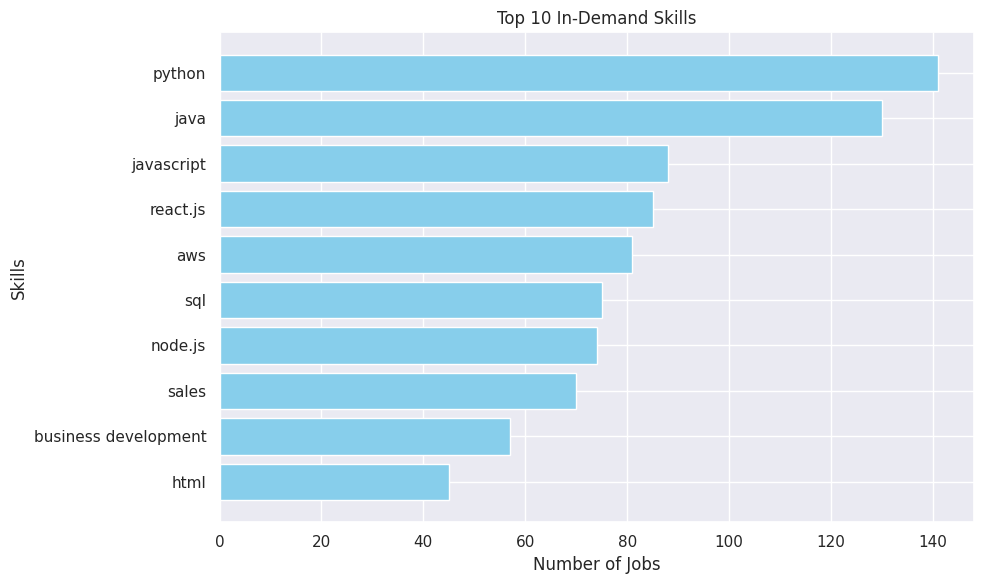

In [274]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_skills['skills'].head(10),df_skills['no_of_jobs'].head(10), color='skyblue')
plt.xlabel('Number of Jobs')
plt.ylabel('Skills')
plt.title('Top 10 In-Demand Skills')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest demand at the top
plt.tight_layout()

# Show the plot
plt.show()